In [1]:
import random

def coin_toss_simulation(trials=10000):
    head = 0   # counter for heads
    tail = 0   # counter for tails

    # Repeat coin toss 'trials' times
    for i in range(trials):
        toss = random.choice(["H", "T"])  # randomly choose Head or Tail
        if toss == "H":
            head += 1   # increment head count
        else:
            tail += 1   # increment tail count

    # Compute probabilities
    pro_head = head / trials
    pro_tail = tail / trials

    # Print results
    print("Coin toss simulation ({} trials)".format(trials))
    print("Number of Heads: {} and Tails: {}".format(head, tail))
    print("P(Head):", pro_head)
    print("P(Tail):", pro_tail)

# Run simulation
coin_toss_simulation()


Coin toss simulation (10000 trials)
Number of Heads: 5117 and Tails: 4883
P(Head): 0.5117
P(Tail): 0.4883


First, we imported the random module to generate random outcomes. Then, we simulated tossing a coin 10,000 times by randomly choosing between "H" (heads) and "T" (tails). We counted how many times each occurred and calculated the experimental probability by dividing the counts by the total number of tosses.

Next, we simulated rolling two dice 10,000 times using random numbers from 1 to 6 for each die. We checked how often the sum of the two dice equaled 7 and calculated its probability.

The results show that the experimental probabilities are very close to the theoretical values: about 0.5 for heads and tails in coin tosses, and about 1/6 (0.1667) for the sum of 7 in dice rolls. This demonstrates how simulations can approximate theoretical probabilities when repeated many times.

In this program, we simulate rolling two dice multiple times to estimate the probability of getting a sum of 7. The function dice_roll_simulation() runs the experiment for a given number of trials (default 10,000).

Two dice are rolled using random.randint(1, 6), which generates a random number between 1 and 6 for each die.

If the sum of the two dice equals 7, it is counted as a successful outcome.
Finally, the code prints the total number of successes and the estimated probability.

The result is usually close to the theoretical probability of getting a sum of 7 with two dice, which is 1/6 ≈ 0.1667.

In [2]:
import random

def dice_roll_simulation(trials=10000):
    sum_seven = 0   # counter for successful outcomes (sum = 7)

    # Repeat the experiment 'trials' times
    for i in range(trials):
        # Roll two dice (each gives a random number between 1 and 6)
        dice1 = random.randint(1, 6)
        dice2 = random.randint(1, 6)

        # Check if their sum equals 7
        if dice1 + dice2 == 7:
            sum_seven += 1   # count this as success

    # Compute probability = successes / total trials
    pro_getting_sum_of_seven = sum_seven / trials

    # Print results
    print("In dice simulation ({} trials)".format(trials))
    print("The number of times sum of seven appeared:", sum_seven)
    print("Estimated Probability of getting sum of seven:", pro_getting_sum_of_seven)

# Run simulation
dice_roll_simulation()


In dice simulation (10000 trials)
The number of times sum of seven appeared: 1607
Estimated Probability of getting sum of seven: 0.1607


In this program, we estimate the probability of getting at least one 6 when a die is rolled 10 times.

The experiment is repeated for a large number of trials (default: 10,000).

In each trial, the die is rolled 10 times.

If a 6 appears at least once, the trial is counted as a success. To save time, the code stops rolling further in that trial as soon as a 6 appears.
Finally, the program prints the number of successful trials and the estimated probability.

In [3]:
import random

def dice_roll(trials=10000):
    success = 0      # counter for successful trials (at least one '6')
    roll = 10        # number of dice rolls in each trial

    # Repeat the experiment 'trials' times
    for i in range(trials):
        six_found = False   # flag to check if '6' appeared in this trial

        # Roll the die 'roll' times in one trial
        for j in range(roll):
            dice = random.randint(1, 6)  # generate random number between 1 and 6
            if dice == 6:                # check if it's a '6'
                six_found = True         # mark success for this trial
                break                    # no need to continue, stop early

        # After 10 rolls, check if this trial was successful
        if six_found:
            success += 1

        # Probability (updated after each trial, but final value is at the end)
        pro_six = success / trials

    # Print results
    print("Number of rolls per trial:", roll)
    print("Number of trials done:", trials)
    print("The number of trials where at least one 6 appeared:", success) 
    print("The probability of getting at least one 6 in 10 rolls:", pro_six)

# Run simulation
dice_roll()


Number of rolls per trial: 10
Number of trials done: 10000
The number of trials where at least one 6 appeared: 8397
The probability of getting at least one 6 in 10 rolls: 0.8397


This program demonstrates conditional probability and Bayes’ theorem through a simulation of drawing balls from a bag. The bag contains 5 red balls, 7 green balls, and 8 blue balls. A large number of trials (for example, 1000) are performed, and in each trial, one ball is chosen at random.

After recording all draws, the program focuses on the conditional probability P(Red | Previous = Blue). This means: given that the previous ball drawn was blue, what is the probability that the current ball is red? To estimate this, the simulation counts the number of times a red ball follows a blue ball and divides it by the total number of times a blue ball appeared as the previous draw.

Next, the program also estimates the simple probabilities of drawing red or blue: P(R) and P(B). Then, it calculates the reverse conditional probability P(Blue | Red), which is the probability that the previous ball was blue given the current ball is red.

The values from the simulation are compared, showing that the probability found directly from the draws is very close to the value predicted by Bayes’ theorem.

In [4]:
import random

def simulate_balls_draw(trials=1000):
    colors = ["R"] * 5 + ["G"] * 7 + ["B"] * 8   # bag composition
    draws = []

    # Step 1: Perform draws
    for _ in range(trials):
        ball = random.choice(colors)  # pick one ball
        draws.append(ball)

    # Step 2: Compute conditional probability P(Red | Previous=Blue)
    count_blue = 0
    count_red_given_blue = 0

    for i in range(1, trials):
        if draws[i-1] == "B":  # check previous ball
            count_blue += 1
            if draws[i] == "R":
                count_red_given_blue += 1

    if count_blue > 0:
        prob_red_given_blue = count_red_given_blue / count_blue
    else:
        prob_red_given_blue = 0

    # Step 3: Estimate probabilities for Bayes' theorem
    # P(R) - probability of red
    p_red = draws.count("R") / trials
    # P(B) - probability of blue
    p_blue = draws.count("B") / trials
    # P(B|R) - probability previous ball = blue given current = red
    count_red = draws.count("R")
    count_blue_given_red = 0
    for i in range(1, trials):
        if draws[i] == "R" and draws[i-1] == "B":
            count_blue_given_red += 1
    p_blue_given_red = count_blue_given_red / count_red if count_red > 0 else 0

    # Step 4: Bayes’ theorem check
    bayes_rhs = (p_blue_given_red * p_red) / p_blue if p_blue > 0 else 0

    # Print results
    print(f"Out of {trials} draws:")
    print(f"P(Red | Previous=Blue) ≈ {prob_red_given_blue:.4f}")
    print(f"P(Red) ≈ {p_red:.4f}")
    print(f"P(Blue) ≈ {p_blue:.4f}")
    print(f"P(Blue | Red) ≈ {p_blue_given_red:.4f}")
    print(f"Bayes’ theorem RHS = {bayes_rhs:.4f}")
    
# Run simulation
simulate_balls_draw()


Out of 1000 draws:
P(Red | Previous=Blue) ≈ 0.2864
P(Red) ≈ 0.2330
P(Blue) ≈ 0.4130
P(Blue | Red) ≈ 0.5064
Bayes’ theorem RHS = 0.2857


This program simulates a discrete random variable with three possible values: 1, 2, and 3. Each value has a specified probability of occurring: 1 occurs with probability 0.25, 2 with probability 0.35, and 3 with probability 0.40.

A random sample of a chosen size (for example, 1000 values) is generated according to these probabilities. This simulates repeatedly observing the random variable in practice.

After generating the sample, the program calculates three important statistical measures:

Mean (average): Represents the central value of the data.

Variance: Measures how much the values are spread out around the mean.

Standard Deviation: The square root of variance, which indicates the typical distance of values from the mean.

Finally, the program prints the sample size along with the estimated mean, variance, and standard deviation. These results give the empirical estimates of the random variable’s behavior. As the sample size becomes larger, these values get closer to the true theoretical mean and variance, showing the reliability of probability models when tested with simulations.

In [5]:
import numpy as np

def simulate_discrete_rv(sample_size=1000):
    # Step 1: Define the values and their probabilities
    values = [1, 2, 3]
    probabilities = [0.25, 0.35, 0.40]

    # Step 2: Generate a random sample
    sample = np.random.choice(values, size=sample_size, p=probabilities)

    # Step 3: Compute statistics
    mean = np.mean(sample)
    variance = np.var(sample)
    std_dev = np.std(sample)

    # Print results
    print(f"Sample size: {sample_size}")
    print(f"Empirical Mean = {mean:.4f}")
    print(f"Empirical Variance = {variance:.4f}")
    print(f"Empirical Standard Deviation = {std_dev:.4f}")

# Run simulation
simulate_discrete_rv()


Sample size: 1000
Empirical Mean = 2.1030
Empirical Variance = 0.6144
Empirical Standard Deviation = 0.7838


This program demonstrates the exponential probability distribution using simulation and visualization. The exponential distribution is often used to model waiting times or the time between events in a process that occurs continuously and independently at a constant rate.

The program first generates a large number of random samples (for example, 2000) from the exponential distribution with a given mean. These samples represent observed values of a random variable that follows this distribution.

Next, the program creates a histogram of the simulated data. The histogram shows how frequently different values occur and provides an empirical picture of the distribution’s shape.

After that, the program calculates and plots the theoretical probability density function (PDF) of the exponential distribution for comparison. The PDF has a characteristic decreasing curve that starts high at zero and gradually slopes down as the value increases.

Finally, the histogram and the theoretical curve are displayed together on the same graph. The comparison shows that the simulated data closely follows the theoretical distribution, confirming that random sampling from a probability model reproduces its expected shape when the sample size is large enough.

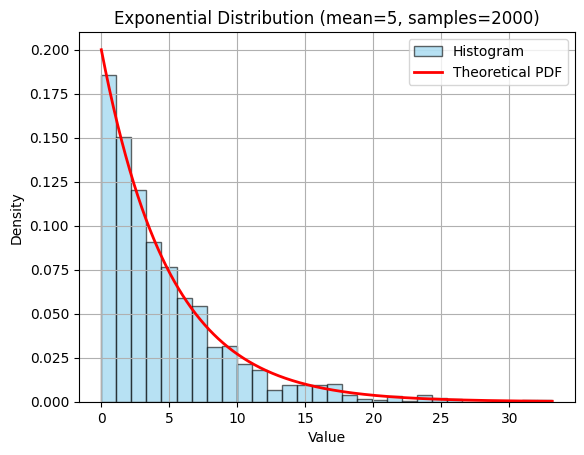

In [6]:
import numpy as np
import matplotlib.pyplot as plt

def exponential_simulation(samples=2000, mean=5):
    # Step 1: Generate random samples
    # numpy takes scale = mean (since scale = 1/λ)
    data = np.random.exponential(scale=mean, size=samples)

    # Step 2: Plot histogram of the data (normalized to density)
    count, bins, ignored = plt.hist(data, bins=30, density=True, alpha=0.6, color='skyblue', edgecolor='black', label="Histogram")

    # Step 3: Plot the theoretical PDF
    # Exponential distribution PDF: f(x) = (1/mean) * exp(-x/mean), x >= 0
    x = np.linspace(0, max(data), 1000)
    pdf = (1/mean) * np.exp(-x/mean)

    plt.plot(x, pdf, 'r-', linewidth=2, label="Theoretical PDF")

    # Step 4: Labels and title
    plt.title(f"Exponential Distribution (mean={mean}, samples={samples})")
    plt.xlabel("Value")
    plt.ylabel("Density")
    plt.legend()
    plt.grid(True)
    plt.show()

# Run simulation
exponential_simulation()


This program illustrates the Central Limit Theorem (CLT) using simulation. The Central Limit Theorem states that when we take repeated samples from any population distribution and compute their means, the distribution of these sample means tends to follow a normal (bell-shaped) curve as the sample size increases, regardless of the shape of the original distribution.

In this experiment, the program first generates 10,000 random numbers from a uniform distribution between 0 and 1. This distribution is flat, meaning all values between 0 and 1 are equally likely.

Next, it repeatedly selects 1000 random samples, each of size 30, from this data. For each sample, the mean value is calculated and stored. These sample means form a new distribution.

Finally, two histograms are displayed:

The left plot shows the original uniform distribution, which is flat.

The right plot shows the distribution of the sample means, which now resembles a normal distribution (bell-shaped curve).

This experiment demonstrates the Central Limit Theorem in action: even though the original data comes from a uniform distribution, the distribution of the sample means becomes approximately normal when the sample size is reasonably large.

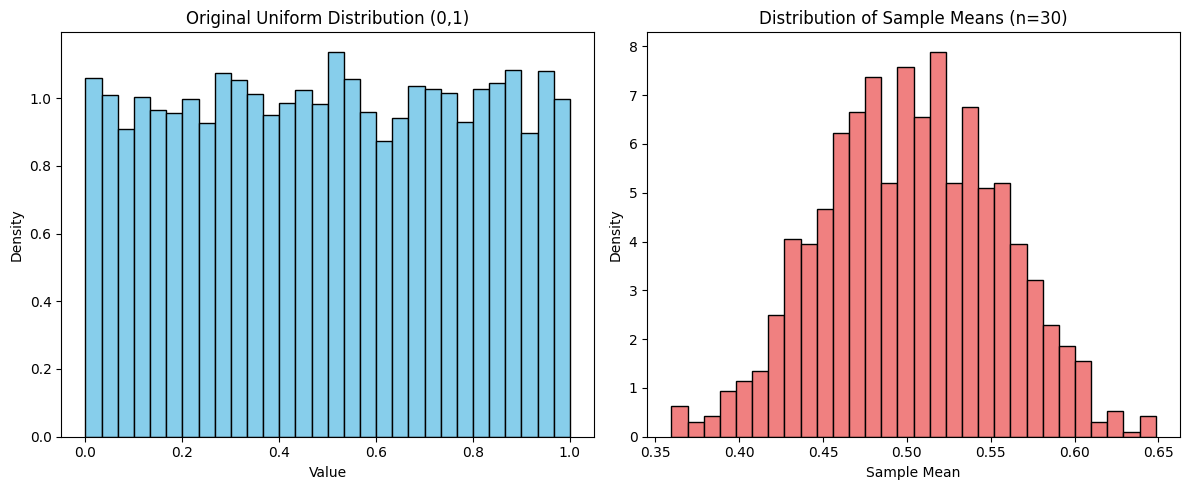

In [7]:
import numpy as np
import matplotlib.pyplot as plt

def central_limit_theorem():
    # Step a: Generate 10,000 random numbers from uniform distribution (0,1)
    data = np.random.uniform(0, 1, 10000)

    # Step b: Take 1000 samples, each of size n=30
    sample_means = []
    n = 30
    for _ in range(1000):
        sample = np.random.choice(data, size=n, replace=True)
        sample_means.append(np.mean(sample))

    # Step c: Visualization
    plt.figure(figsize=(12, 5))

    # Left: Original uniform distribution
    plt.subplot(1, 2, 1)
    plt.hist(data, bins=30, color='skyblue', edgecolor='black', density=True)
    plt.title("Original Uniform Distribution (0,1)")
    plt.xlabel("Value")
    plt.ylabel("Density")

    # Right: Distribution of sample means
    plt.subplot(1, 2, 2)
    plt.hist(sample_means, bins=30, color='lightcoral', edgecolor='black', density=True)
    plt.title("Distribution of Sample Means (n=30)")
    plt.xlabel("Sample Mean")
    plt.ylabel("Density")

    plt.tight_layout()
    plt.show()

# Run simulation
central_limit_theorem()
